# Data Science Exercise
## Week 4, Monday

• Load read count dataset from week 1

• Rename columns and remove unwanted columns (Chr, Start, End, Strand, Length)

• Filter out genes with no counts

• Plot scatter plot of correlation of replicates (pairs plot) (you will need to google how to show plots in jupyter notebook)

• Tidy data

• Plot histogram and density plot of read counts across all samples

• Plot a violin plot of read counts per sample

• Identify gene with highest expression in each sample

• Normalise read counts to total reads per sample total reads & convert to 'counts per million (CPM)'

• Log transform normalised read counts

• Create new dataframe of 100 genes with highest average variance in log cpm across conditions

• Plot the of expression of the top 5 most variable genes (log cpm) across all samples (line plot)

• Plot a heatmap for top 100 most variable genes (log cpm) across all samples

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [120]:
# Load read count dataset from week 1
readcounts=pd.read_csv('readcounts.tsv', sep='\t', header=0, comment='#')
readcounts

,Geneid,Chr,Start,End,Strand,Length,ERR1755082_sort.bam,ERR1755083_sort.bam,ERR1755084_sort.bam,ERR1755085_sort.bam,ERR1755086_sort.bam,ERR1755087_sort.bam,ERR1755088_sort.bam,ERR1755089_sort.bam
0,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3205901;3206523;3213439;3213609;3214482;342170...,3207317;3207317;3215632;3216344;3216968;342190...,-;-;-;-;-;-;-,6094,0,0,0,0,0,0,0,0
1,ENSMUSG00000025900,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,3999557;4007656;4019070;4024736;4041888;409261...,3999617;4007737;4019148;4024890;4042107;409278...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,12311,0,1,0,0,0,0,0,0
2,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4490931;4491250;4491390;4491713;4492457;449245...,4492668;4492663;4492668;4492668;4493604;449266...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,0,0,1,0,0,1,0,0
3,ENSMUSG00000033845,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4773206;4773211;4774436;4776377;4777525;477752...,4774516;4776801;4774516;4776801;4777648;477764...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,762,667,703,788,659,715,1344,1489
4,ENSMUSG00000025903,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4807788;4807823;4807830;4807896;4807898;480791...,4807982;4807982;4807982;4807982;4807982;480798...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2296,1730,1951,2422,1984,1859,1735,1883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,ENSMUSG00000065947,chrM,9877,10173,+,297,75,34,65,51,52,42,82,68
21997,ENSMUSG00000064363,chrM,10167,11544,+,1378,34761,29266,33044,29704,23945,24246,41739,40198
21998,ENSMUSG00000064367,chrM,11742,13565,+,1824,52126,42819,48843,43783,35352,34936,71499,58561
21999,ENSMUSG00000064368,chrM,13552,14070,-,519,494,361,483,298,294,264,491,504


In [121]:
# Rename columns and remove unwanted columns (Chr, Start, End, Strand, Length)
readcounts=readcounts.drop(["Chr","Start","End", "Strand","Length"],1)
readcounts

,Geneid,ERR1755082_sort.bam,ERR1755083_sort.bam,ERR1755084_sort.bam,ERR1755085_sort.bam,ERR1755086_sort.bam,ERR1755087_sort.bam,ERR1755088_sort.bam,ERR1755089_sort.bam
0,ENSMUSG00000051951,0,0,0,0,0,0,0,0
1,ENSMUSG00000025900,0,1,0,0,0,0,0,0
2,ENSMUSG00000025902,0,0,1,0,0,1,0,0
3,ENSMUSG00000033845,762,667,703,788,659,715,1344,1489
4,ENSMUSG00000025903,2296,1730,1951,2422,1984,1859,1735,1883
...,...,...,...,...,...,...,...,...,...
21996,ENSMUSG00000065947,75,34,65,51,52,42,82,68
21997,ENSMUSG00000064363,34761,29266,33044,29704,23945,24246,41739,40198
21998,ENSMUSG00000064367,52126,42819,48843,43783,35352,34936,71499,58561
21999,ENSMUSG00000064368,494,361,483,298,294,264,491,504


In [122]:
readcounts=readcounts.rename(columns = {"ERR1755082_sort.bam":'ERR1755082',
                                       'ERR1755083_sort.bam':'ERR1755083',
                                       'ERR1755084_sort.bam':'ERR1755084',
                                       'ERR1755085_sort.bam':'ERR1755085',
                                       'ERR1755086_sort.bam':'ERR1755086',
                                       'ERR1755087_sort.bam':'ERR1755087',
                                       'ERR1755088_sort.bam':'ERR1755088',
                                       'ERR1755089_sort.bam':'ERR1755089',
                                       })
readcounts

,Geneid,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
0,ENSMUSG00000051951,0,0,0,0,0,0,0,0
1,ENSMUSG00000025900,0,1,0,0,0,0,0,0
2,ENSMUSG00000025902,0,0,1,0,0,1,0,0
3,ENSMUSG00000033845,762,667,703,788,659,715,1344,1489
4,ENSMUSG00000025903,2296,1730,1951,2422,1984,1859,1735,1883
...,...,...,...,...,...,...,...,...,...
21996,ENSMUSG00000065947,75,34,65,51,52,42,82,68
21997,ENSMUSG00000064363,34761,29266,33044,29704,23945,24246,41739,40198
21998,ENSMUSG00000064367,52126,42819,48843,43783,35352,34936,71499,58561
21999,ENSMUSG00000064368,494,361,483,298,294,264,491,504


In [123]:
# Filter out genes with no counts
#readcounts = readcounts.apply(np.)
readcounts["column_sum"]=readcounts[['ERR1755082', 'ERR1755083', 'ERR1755084', 'ERR1755085', 'ERR1755086', 'ERR1755087', 'ERR1755088', 'ERR1755089']].apply(np.sum, axis=1)
readcounts

readcounts_filtered=readcounts[readcounts["column_sum"]>8]
readcounts


,Geneid,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089,column_sum
0,ENSMUSG00000051951,0,0,0,0,0,0,0,0,0
1,ENSMUSG00000025900,0,1,0,0,0,0,0,0,1
2,ENSMUSG00000025902,0,0,1,0,0,1,0,0,2
3,ENSMUSG00000033845,762,667,703,788,659,715,1344,1489,7127
4,ENSMUSG00000025903,2296,1730,1951,2422,1984,1859,1735,1883,15860
...,...,...,...,...,...,...,...,...,...,...
21996,ENSMUSG00000065947,75,34,65,51,52,42,82,68,469
21997,ENSMUSG00000064363,34761,29266,33044,29704,23945,24246,41739,40198,256903
21998,ENSMUSG00000064367,52126,42819,48843,43783,35352,34936,71499,58561,387919
21999,ENSMUSG00000064368,494,361,483,298,294,264,491,504,3189


In [124]:
readcounts_filtered

,Geneid,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089,column_sum
3,ENSMUSG00000033845,762,667,703,788,659,715,1344,1489,7127
4,ENSMUSG00000025903,2296,1730,1951,2422,1984,1859,1735,1883,15860
5,ENSMUSG00000104217,0,2,2,1,1,0,49,37,92
6,ENSMUSG00000033813,1072,874,1052,992,813,833,1720,1852,9208
8,ENSMUSG00000033793,1290,1058,1160,1298,1192,1184,1662,1711,10555
...,...,...,...,...,...,...,...,...,...,...
21996,ENSMUSG00000065947,75,34,65,51,52,42,82,68,469
21997,ENSMUSG00000064363,34761,29266,33044,29704,23945,24246,41739,40198,256903
21998,ENSMUSG00000064367,52126,42819,48843,43783,35352,34936,71499,58561,387919
21999,ENSMUSG00000064368,494,361,483,298,294,264,491,504,3189


In [125]:
# Plot scatter plot of correlation of replicates (pairs plot) (you will need to google how to show plots in jupyter notebook)
# pairplot_plot=sns.pairplot(readcounts_filtered[['ERR1755082', 'ERR1755083', 'ERR1755084', 'ERR1755085', 'ERR1755086', 'ERR1755087', 'ERR1755088', 'ERR1755089']])
# plt.show(pairplot_plot)


In [126]:
# Tidy data
# melted = df.melt(id_vars=['country'], var_name='year', value_name='cases')
readcounts_filtered = readcounts_filtered.drop("column_sum", axis=1)
melted_readcounts = readcounts_filtered.melt(id_vars=["Geneid"], var_name="sample", value_name = "count")

melted_readcounts

,Geneid,sample,count
0,ENSMUSG00000033845,ERR1755082,762
1,ENSMUSG00000025903,ERR1755082,2296
2,ENSMUSG00000104217,ERR1755082,0
3,ENSMUSG00000033813,ERR1755082,1072
4,ENSMUSG00000033793,ERR1755082,1290
...,...,...,...
112411,ENSMUSG00000065947,ERR1755089,68
112412,ENSMUSG00000064363,ERR1755089,40198
112413,ENSMUSG00000064367,ERR1755089,58561
112414,ENSMUSG00000064368,ERR1755089,504


In [127]:
# Plot histogram and density plot of read counts across all samples
#sns.displot(data = melted_readcounts, x = "count") # All together
#sns.displot(readcounts_filtered[['ERR1755082','ERR1755083','ERR1755084','ERR1755085','ERR1755086','ERR1755087','ERR1755088','ERR1755089']],bins=20,kde=True) # Stacked on top of eachother
#sns.displot(melted_readcounts, x = "count", col = "sample", bins=20, kde=True) # Faceted (next to eachother)

#sns.displot(data = np.log(melted_readcounts['count']+1)) # All together, log transformed

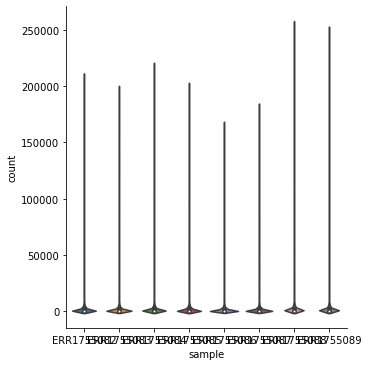

In [128]:
# Plot a violin plot of read counts per sample
sns.catplot(data = melted_readcounts, x="sample", y="count", kind = "violin")

# sns.catplot(data = melted_readcounts, y = np.log(int("count")+1), x="sample", kind = "violin")

In [129]:
readcounts_filtered = readcounts_filtered.set_index("Geneid")
readcounts_filtered

,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
Geneid,,,,,,,,
ENSMUSG00000033845,762,667,703,788,659,715,1344,1489
ENSMUSG00000025903,2296,1730,1951,2422,1984,1859,1735,1883
ENSMUSG00000104217,0,2,2,1,1,0,49,37
ENSMUSG00000033813,1072,874,1052,992,813,833,1720,1852
ENSMUSG00000033793,1290,1058,1160,1298,1192,1184,1662,1711
...,...,...,...,...,...,...,...,...
ENSMUSG00000065947,75,34,65,51,52,42,82,68
ENSMUSG00000064363,34761,29266,33044,29704,23945,24246,41739,40198
ENSMUSG00000064367,52126,42819,48843,43783,35352,34936,71499,58561


In [130]:
total_count = readcounts_filtered.sum(axis=0)
total_count

ERR1755082    27598889
ERR1755083    25674252
ERR1755084    26768278
ERR1755085    27189125
ERR1755086    23182975
ERR1755087    24393500
ERR1755088    28387553
ERR1755089    27708477
dtype: int64

In [131]:
normalised_counts = readcounts_filtered/total_count
normalised_counts

,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
Geneid,,,,,,,,
ENSMUSG00000033845,0.000028,2.597934e-05,2.626243e-05,2.898218e-05,2.842603e-05,0.000029,0.000047,0.000054
ENSMUSG00000025903,0.000083,6.738268e-05,7.288478e-05,8.907973e-05,8.558004e-05,0.000076,0.000061,0.000068
ENSMUSG00000104217,0.000000,7.789906e-08,7.471530e-08,3.677941e-08,4.313510e-08,0.000000,0.000002,0.000001
ENSMUSG00000033813,0.000039,3.404189e-05,3.930025e-05,3.648518e-05,3.506884e-05,0.000034,0.000061,0.000067
ENSMUSG00000033793,0.000047,4.120860e-05,4.333488e-05,4.773968e-05,5.141704e-05,0.000049,0.000059,0.000062
...,...,...,...,...,...,...,...,...
ENSMUSG00000065947,0.000003,1.324284e-06,2.428247e-06,1.875750e-06,2.243025e-06,0.000002,0.000003,0.000002
ENSMUSG00000064363,0.001260,1.139897e-03,1.234446e-03,1.092496e-03,1.032870e-03,0.000994,0.001470,0.001451
ENSMUSG00000064367,0.001889,1.667780e-03,1.824660e-03,1.610313e-03,1.524912e-03,0.001432,0.002519,0.002113


In [132]:
CPM_filtered = normalised_counts*1e6
CPM_filtered

,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
Geneid,,,,,,,,
ENSMUSG00000033845,27.609807,25.979335,26.262429,28.982176,28.426032,29.311087,47.344694,53.738067
ENSMUSG00000025903,83.191755,67.382684,72.884778,89.079733,85.580043,76.208826,61.118336,67.957542
ENSMUSG00000104217,0.000000,0.077899,0.074715,0.036779,0.043135,0.000000,1.726109,1.335331
ENSMUSG00000033813,38.842143,34.041888,39.300249,36.485176,35.068838,34.148441,60.589935,66.838751
ENSMUSG00000033793,46.741012,41.208601,43.334876,47.739675,51.417042,48.537520,58.546786,61.750056
...,...,...,...,...,...,...,...,...
ENSMUSG00000065947,2.717501,1.324284,2.428247,1.875750,2.243025,1.721770,2.888590,2.454123
ENSMUSG00000064363,1259.507221,1139.896890,1234.446235,1092.495621,1032.870026,993.953307,1470.327506,1450.747365
ENSMUSG00000064367,1888.699215,1667.779844,1824.659771,1610.312947,1524.912139,1432.184803,2518.674294,2113.468741


In [133]:
# Log transform normalised read counts
# normalised_counts = normalised_counts.float()
transformed_normalised=np.log(CPM_filtered+1)
transformed_normalised


,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
Geneid,,,,,,,,
ENSMUSG00000033845,3.353750,3.295071,3.305510,3.400603,3.381880,3.411514,3.878356,4.002559
ENSMUSG00000025903,4.433097,4.225120,4.302507,4.500695,4.461069,4.346514,4.129041,4.233491
ENSMUSG00000104217,0.000000,0.075014,0.072056,0.036119,0.042231,0.000000,1.002875,0.848154
ENSMUSG00000033813,3.684925,3.556544,3.696358,3.623946,3.585429,3.559580,4.120498,4.217134
ENSMUSG00000033793,3.865791,3.742624,3.791772,3.886493,3.959232,3.902730,4.086762,4.139159
...,...,...,...,...,...,...,...,...
ENSMUSG00000065947,1.313052,0.843412,1.232049,1.056313,1.176507,1.001282,1.358047,1.239568
ENSMUSG00000064363,7.139269,7.039570,7.119188,6.997135,6.941064,6.902696,7.293920,7.280523
ENSMUSG00000064367,7.544173,7.419848,7.509697,7.384805,7.330348,7.267654,7.831885,7.656559


In [134]:
# Create new dataframe of 100 genes with highest average variance in log cpm across conditions
transformed_normalised['variance'] = np.var(transformed_normalised, axis = 1)
top100 = transformed_normalised.nlargest(100, "variance")
top100

,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089,variance
Geneid,,,,,,,,,
ENSMUSG00000053977,5.114861,5.091542,5.132532,7.125434,7.134807,7.148631,0.936084,0.964720,5.787656
ENSMUSG00000069045,5.784824,5.600098,5.744088,5.209603,5.155913,5.051958,0.000000,0.000000,5.582039
ENSMUSG00000023132,4.814813,4.717162,4.762455,7.636613,7.646338,7.569661,1.485459,1.700222,5.494425
ENSMUSG00000030149,4.044615,3.885949,3.912288,6.133797,6.129914,6.101411,0.686298,0.661832,4.453450
ENSMUSG00000031933,4.343092,4.542588,4.440656,1.165263,1.335996,1.394658,6.391328,6.472309,4.237442
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000024501,2.816921,2.769874,2.875609,0.462772,0.498972,0.479284,0.034620,0.102800,1.497330
ENSMUSG00000060586,3.851266,3.927453,3.905542,5.643843,5.672721,5.720900,2.538451,2.666492,1.493548
ENSMUSG00000038936,1.599273,1.452026,1.547224,0.551346,0.574607,0.453571,3.621382,3.699085,1.490155


In [135]:
# Plot the of expression of the top 5 most variable genes (log cpm) across all samples (line plot)
top5 = top100.nlargest(5, 'variance')
top5 = top5.drop("variance", axis=1)
top5

,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
Geneid,,,,,,,,
ENSMUSG00000053977,5.114861,5.091542,5.132532,7.125434,7.134807,7.148631,0.936084,0.964720
ENSMUSG00000069045,5.784824,5.600098,5.744088,5.209603,5.155913,5.051958,0.000000,0.000000
ENSMUSG00000023132,4.814813,4.717162,4.762455,7.636613,7.646338,7.569661,1.485459,1.700222
ENSMUSG00000030149,4.044615,3.885949,3.912288,6.133797,6.129914,6.101411,0.686298,0.661832
ENSMUSG00000031933,4.343092,4.542588,4.440656,1.165263,1.335996,1.394658,6.391328,6.472309


In [136]:
top5 = top5.reset_index("Geneid")
top5

,Geneid,ERR1755082,ERR1755083,ERR1755084,ERR1755085,ERR1755086,ERR1755087,ERR1755088,ERR1755089
0,ENSMUSG00000053977,5.114861,5.091542,5.132532,7.125434,7.134807,7.148631,0.936084,0.964720
1,ENSMUSG00000069045,5.784824,5.600098,5.744088,5.209603,5.155913,5.051958,0.000000,0.000000
2,ENSMUSG00000023132,4.814813,4.717162,4.762455,7.636613,7.646338,7.569661,1.485459,1.700222
3,ENSMUSG00000030149,4.044615,3.885949,3.912288,6.133797,6.129914,6.101411,0.686298,0.661832
4,ENSMUSG00000031933,4.343092,4.542588,4.440656,1.165263,1.335996,1.394658,6.391328,6.472309


In [137]:
melted_top5 = top5.melt(id_vars=["Geneid"], var_name="sample", value_name = "count")
melted_top5

,Geneid,sample,count
0,ENSMUSG00000053977,ERR1755082,5.114861
1,ENSMUSG00000069045,ERR1755082,5.784824
2,ENSMUSG00000023132,ERR1755082,4.814813
3,ENSMUSG00000030149,ERR1755082,4.044615
4,ENSMUSG00000031933,ERR1755082,4.343092
5,ENSMUSG00000053977,ERR1755083,5.091542
6,ENSMUSG00000069045,ERR1755083,5.600098
7,ENSMUSG00000023132,ERR1755083,4.717162
8,ENSMUSG00000030149,ERR1755083,3.885949
9,ENSMUSG00000031933,ERR1755083,4.542588


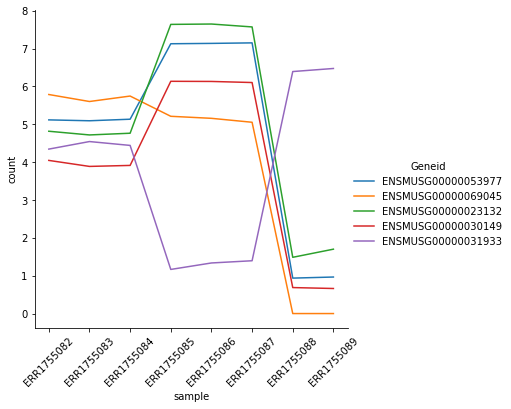

In [138]:
top5plot = sns.relplot(data = melted_top5, x = "sample", y = "count", kind="line", hue = "Geneid")
top5plot.set_xticklabels(rotation = 45)

In [139]:
# Plot a heatmap for top 100 most variable genes (log cpm) across all samples
top100 = top100.drop("variance", axis = 1)

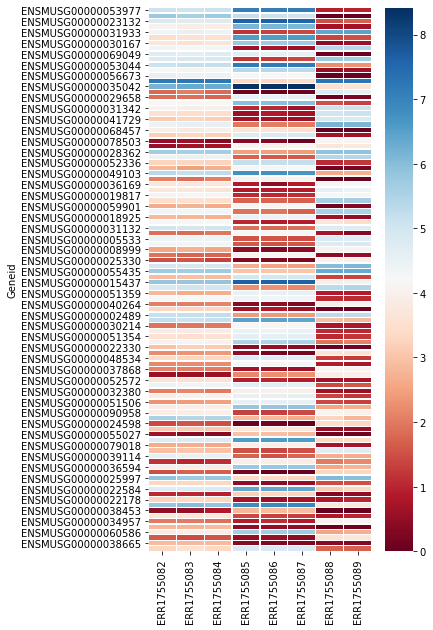

In [140]:
plt.figure(figsize=(5,10))
heatmapplot = sns.heatmap(top100, cmap="RdBu", linewidths=0.2)

In [ ]:
/ifs/obds-training/sep20/phil/obds/week3/rna_pipeline_exercise/readcount.tsv

In [ ]:
readcounts=pd.read_csv('readcounts.tsv', sep='\t', header=0, comment='#')
readcounts